dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
data.data :(506, 13), data.target: (506,), num_features: 13
num_datapoints : 506
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224641e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01] 36.45948838715819


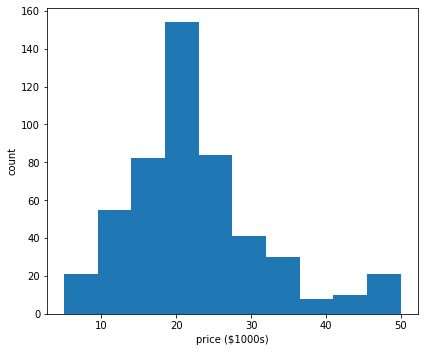

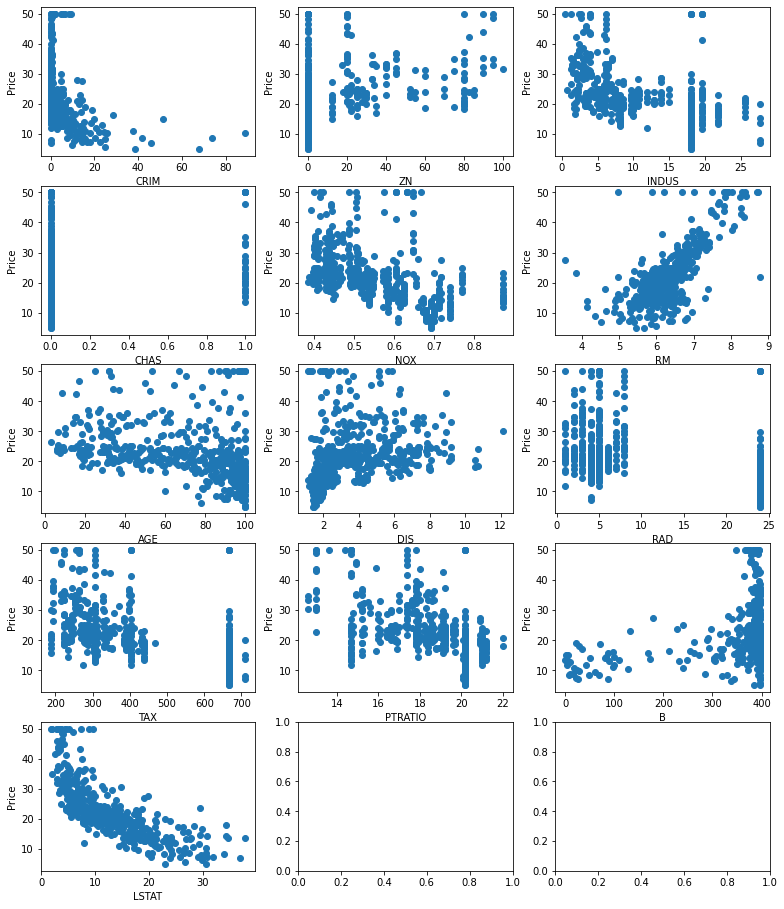

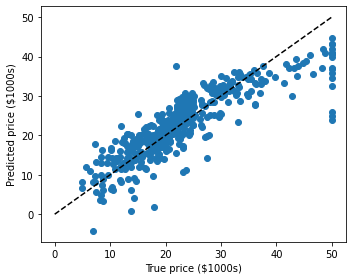

In [2]:
import numpy as np
import sklearn
# we used the library sklearn here only to load the data

# You dont have to care about matplotlib for now
import matplotlib.pyplot as plt

# load data from sklearn
from sklearn.datasets import load_boston
data = load_boston()
print(data.keys())
X= data.data
y = data.target
feature_names = data.feature_names
print('data.data :{0}, data.target: {1}, num_features: {2}'.format(X.shape, y.shape, len(feature_names)))
print('num_datapoints : {}'.format(X.shape[0]))
def label_histogram():
    plt.figure(figsize=(6, 5))
    plt.hist(y)
    plt.xlabel('price ($1000s)')
    plt.ylabel('count')
    plt.tight_layout()
label_histogram()

def price_single_feature_ploting(input_data, feature_names):
    fig, axes = plt.subplots(5, 3, figsize = (15, 15))
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    for index, (ax, feature_name) in enumerate(zip(axes.flat[:-2],feature_names)): 
        ax.scatter(input_data[:, index], y)
        ax.set(xlabel=feature_name, ylabel='Price')
price_single_feature_ploting(X, feature_names)  

def training(X, y):
	X1 = np.ones((X.shape[0],1))
	#print(X1)
	Xnew = np.hstack((X1,X))
	#print(Xnew)
	theta = (np.linalg.pinv(Xnew.T@Xnew))@Xnew.T@y.T
	#print(theta)
	return theta[1:14], theta[0]

coefficients, intercept = training(X,y)
print(coefficients, intercept)
assert np.allclose(coefficients,
                   np.array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
                             -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
                             3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
                             -5.24758378e-01]))
assert np.allclose(intercept, 36.459488385090125)

def prediction(X, coefficients, intercept):
	y = X@coefficients + intercept
	return y

def MSE(X, y_target, coefficients, intercept):
	y_predict = prediction(X, coefficients, intercept)
	assert len(y_predict) == len(y_target)
	MSE = np.sum(np.square(y_target - y_predict))/X.shape[0]
	return MSE

mse = MSE(X, y, coefficients, intercept)
assert np.allclose(mse, 21.894831181729202)
def visualize_results(y_predict, y_target):
    plt.figure(figsize=(5, 4))
    plt.scatter(y_target, y_predict)
    plt.plot([0, 50], [0, 50], '--k')
    plt.axis('tight')
    plt.xlabel('True price ($1000s)')
    plt.ylabel('Predicted price ($1000s)')
    plt.tight_layout()
visualize_results(prediction(X, coefficients, intercept), y) 
plt.show()
  

